In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization,Conv2D,MaxPooling2D,Activation,Flatten,Dropout,Dense
from tensorflow.keras import backend as k

In [28]:
class smallVGGNet:
    @staticmethod
    def build(width,height,depth,classes):
        model = Sequential()
        inputShape = (height,width,depth)
        chanDim = -1
        #if k.image_data_format()=="channels_first":
        #    inputShape=(depth,height,width)
        #    chanDim=1
        model.add(Conv2D(32,(3,3),padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.25))
        model.add(Conv2D(64,(3,3),padding = "same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64,(3,3),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model
        

In [5]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

C:\Users\Sujay J\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Sujay J\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Sujay J\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Sujay J\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [34]:
base_dir=os.path.dirname(os.path.abspath("keras_tut"))
dataset = os.path.join(base_dir,"animals")
dataset


'C:\\Users\\Sujay J\\Desktop\\PYImage\\my exersize\\Untitled Folder\\animals'

In [35]:
basse = os.getcwd()
dataa = os.path.join(basse,"animals")
dataa

'C:\\Users\\Sujay J\\Desktop\\PYImage\\my exersize\\Untitled Folder\\animals'

In [77]:
MMModel = os.path.dirname(os.path.abspath("output/smallvggnet.model"))
LLb = os.path.dirname(os.path.abspath("output/smallvggnet_lb.pickle"))

In [37]:
data = []
labels = []

In [38]:
data=[]
labels=[]
imagesPaths = sorted(list(paths.list_images(dataa)))
random.seed(42)
random.shuffle(imagesPaths)
for imagePath in imagesPaths:
    image  = cv2.imread(imagePath)
    image = cv2.resize(image,(64,64))
    data.append(image)
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
data = np.array(data,dtype="float")/255.0
labels = np.array(labels)

In [39]:
(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.25,random_state=42)

In [40]:
lb=LabelBinarizer()
trainY=lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [41]:
aug = ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,
                        shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")


In [42]:
model = smallVGGNet.build(width=64,height=64,depth = 3,classes = len(lb.classes_))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_16 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 64)       

In [44]:

EPOCHS = 75
BS = 32
opt = SGD(lr=0.01,decay = 0.01/EPOCHS)

In [45]:
model.compile(loss = "categorical_crossentropy",optimizer = opt,metrics=["accuracy"])

In [46]:
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
epochs=EPOCHS)

Train for 70 steps, validate on 750 samples
Epoch 1/75
70/70 [==============================] - 36s 508ms/step - loss: 1.3190 - accuracy: 0.5280 - val_loss: 1.7709 - val_accuracy: 0.3173
Epoch 2/75
70/70 [==============================] - 36s 509ms/step - loss: 1.0468 - accuracy: 0.5866 - val_loss: 1.7534 - val_accuracy: 0.3293
Epoch 3/75
70/70 [==============================] - 36s 514ms/step - loss: 0.8964 - accuracy: 0.6190 - val_loss: 2.0986 - val_accuracy: 0.3173
Epoch 4/75
70/70 [==============================] - 36s 511ms/step - loss: 0.8286 - accuracy: 0.6181 - val_loss: 1.7320 - val_accuracy: 0.3520
Epoch 5/75
70/70 [==============================] - 36s 519ms/step - loss: 0.7845 - accuracy: 0.6231 - val_loss: 1.5411 - val_accuracy: 0.3587
Epoch 6/75
70/70 [==============================] - 36s 509ms/step - loss: 0.7302 - accuracy: 0.6569 - val_loss: 1.3323 - val_accuracy: 0.4253
Epoch 7/75
70/70 [==============================] - 36s 513ms/step - loss: 0.7378 - accuracy: 0.64

70/70 [==============================] - 58s 830ms/step - loss: 0.4299 - accuracy: 0.7971 - val_loss: 0.6448 - val_accuracy: 0.7453
Epoch 58/75
70/70 [==============================] - 58s 831ms/step - loss: 0.4414 - accuracy: 0.8016 - val_loss: 0.6399 - val_accuracy: 0.7547
Epoch 59/75
70/70 [==============================] - 58s 831ms/step - loss: 0.4408 - accuracy: 0.8003 - val_loss: 0.7156 - val_accuracy: 0.7387
Epoch 60/75
70/70 [==============================] - 58s 835ms/step - loss: 0.4398 - accuracy: 0.8070 - val_loss: 0.6111 - val_accuracy: 0.7493
Epoch 61/75
70/70 [==============================] - 59s 836ms/step - loss: 0.4480 - accuracy: 0.7953 - val_loss: 0.6519 - val_accuracy: 0.7520
Epoch 62/75
70/70 [==============================] - 59s 837ms/step - loss: 0.4232 - accuracy: 0.8093 - val_loss: 0.6500 - val_accuracy: 0.7387
Epoch 63/75
70/70 [==============================] - 60s 853ms/step - loss: 0.4201 - accuracy: 0.8097 - val_loss: 0.6719 - val_accuracy: 0.7493
Epoc

In [47]:
predictions= model.predict(x=testX,batch_size=32)
print(classification_report(testY.argmax(axis =1),predictions.argmax(axis=1),target_names=lb.classes_))

              precision    recall  f1-score   support

        cats       0.62      0.82      0.71       236
        dogs       0.69      0.53      0.59       236
       panda       0.94      0.87      0.90       278

    accuracy                           0.75       750
   macro avg       0.75      0.74      0.74       750
weighted avg       0.76      0.75      0.75       750



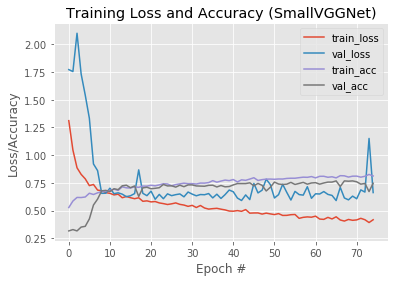

In [49]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("Convo")

In [78]:
model.save("MMModel",save_format="h5")

In [79]:
f = open("LLb", "wb")
f.write(pickle.dumps(lb))
f.close()

In [71]:
img= cv2.imread("cat.jpg")
output = img.copy()
#img= cv2.resize(img,(64,64),3)

In [56]:
from tensorflow.keras.models import load_model


In [58]:
model1=load_model("MMModel")

In [89]:
image = cv2.imread("panda.jpg")

In [90]:
image=cv2.resize(image,(64,64))

In [91]:
image = image.astype("float") / 255.0

In [80]:
model1=load_model("MMModel")

In [92]:
lllb = pickle.loads(open("LLb","rb").read())

In [93]:
image = image.reshape((1, image.shape[0], image.shape[1],image.shape[2]))

In [99]:
preds = model1.predict(image)

In [100]:
i = preds.argmax(axis=1)[0]
labell = lllb.classes_[i]

In [103]:
labell

'panda'